In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
#to look at all the gpus

tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
#loading the datset from kears
(x_train,y_train), (x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
#to see the images
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])


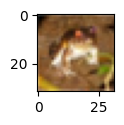

In [11]:
plot_sample(0)

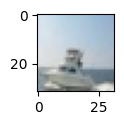

In [15]:
plot_sample(100)

In [16]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [21]:
classes[y_train [100][0]]

'ship'

In [22]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [23]:
#scalling the images
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [24]:
x_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [29]:
#one hard encoding for label data
y_train_cat=keras.utils.to_categorical(y_train,num_classes=10,dtype="float32")
y_test_cat=keras.utils.to_categorical(y_test,num_classes=10,dtype="float32")
#y_train_cat[:5]

In [34]:
#model building using neural networks
#here we are creating a NN with 2 hidden layers
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')   #output layer
])

#whenever we have one hard encoded values we use loss=categorical_crossentropy
#if not one hard encoded and the y_train is discrete then loss=sparse_categorical_crossentropy
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train_scaled, y_train_cat, epochs=40)
#putiing more no. of epochs will give more accuracy

Epoch 1/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8804 - accuracy: 0.3277
Epoch 2/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6643 - accuracy: 0.4030
Epoch 3/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5849 - accuracy: 0.4316
Epoch 4/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5301 - accuracy: 0.4506
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4837 - accuracy: 0.4698
Epoch 6/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4529 - accuracy: 0.4787
Epoch 7/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4306 - accuracy: 0.4877
Epoch 8/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4016 - accuracy: 0.4982
Epoch 9/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3802 - accuracy: 0.5052
Epoch 10/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

In [36]:
model.evaluate(x_test_scaled, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 1.6954 - accuracy: 0.4859


[1.695366621017456, 0.48590001463890076]

In [37]:
model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


array([[1.2924619e-01, 2.2989044e-01, 5.7945918e-02, ..., 5.5212479e-02,
        3.4351137e-01, 4.2992938e-01],
       [7.2217906e-01, 2.1885999e-02, 3.5703904e-03, ..., 2.1980414e-03,
        7.1700978e-01, 4.2441610e-01],
       [7.9360348e-01, 8.4683436e-01, 3.6239792e-02, ..., 3.4846318e-01,
        9.4505632e-01, 8.1305408e-01],
       ...,
       [4.0268666e-18, 2.1083920e-23, 2.4903139e-07, ..., 2.5333971e-12,
        1.4094411e-11, 7.5077647e-30],
       [3.7289791e-02, 1.4650836e-03, 2.2546698e-03, ..., 1.5456396e-02,
        3.2944884e-03, 6.3738372e-04],
       [4.2732829e-01, 1.4469588e-02, 5.7202256e-01, ..., 7.7793324e-01,
        8.8943087e-02, 1.9001735e-02]], dtype=float32)

In [38]:
classes[y_test[0][0]]

'cat'

In [44]:
np.argmax(model.predict(x_test_scaled)[1])

313/313 [==============================] - 1s 2ms/step


0

In [45]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'airplane'

In [46]:
y_test_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)